In [169]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import scipy.optimize as fit
from astropy.table import QTable
import astropy.units as u

## 1. Problem 1: Curve Fitting Guided Problem

In [2]:
global_land_temp = pd.read_csv('GlobalLandTemperaturesByState.csv')
display(global_land_temp)

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil
...,...,...,...,...,...
645670,2013-05-01,21.634,0.578,Zhejiang,China
645671,2013-06-01,24.679,0.596,Zhejiang,China
645672,2013-07-01,29.272,1.340,Zhejiang,China
645673,2013-08-01,29.202,0.869,Zhejiang,China


In [3]:
#filter by date, temp, state
glt = global_land_temp[['dt', 'AverageTemperature', 'State']]

#filter by dates after 2000
glt['dt'] = pd.to_datetime(glt['dt'])
glt = glt[glt['dt'].dt.year >= 2000]

#filter by states: Wyoming, Nebraska, South Dakota
selected_states = ['Wyoming', 'Nebraska', 'South Dakota']
glt = glt[glt['State'].isin(selected_states)]


glt

C:\Users\jacob\AppData\Local\Temp\ipykernel_13064\617173834.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  glt['dt'] = pd.to_datetime(glt['dt'])


,dt,AverageTemperature,State
350761,2000-01-01,-2.024,Nebraska
350762,2000-02-01,1.719,Nebraska
350763,2000-03-01,5.687,Nebraska
350764,2000-04-01,9.417,Nebraska
350765,2000-05-01,16.827,Nebraska
...,...,...,...
626435,2013-05-01,10.607,Wyoming
626436,2013-06-01,16.267,Wyoming
626437,2013-07-01,20.222,Wyoming
626438,2013-08-01,19.621,Wyoming


In [4]:
glt_mod = glt.groupby('dt')['AverageTemperature'].mean()
display(glt_mod)

dt
2000-01-01    -4.072000
2000-02-01    -0.205000
2000-03-01     3.642667
2000-04-01     7.609667
2000-05-01    14.255000
                ...    
2013-05-01    13.196000
2013-06-01    18.783667
2013-07-01    22.110333
2013-08-01    21.890000
2013-09-01    18.953000
Name: AverageTemperature, Length: 165, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

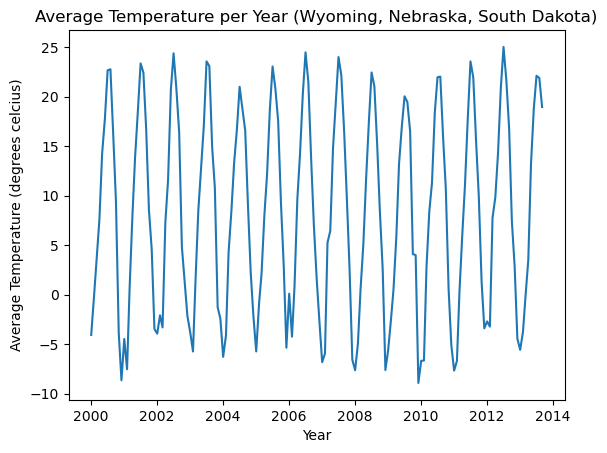

In [33]:
plt.title('Average Temperature per Year (Wyoming, Nebraska, South Dakota)')
glt_xdata = glt_mod.index
plt.xlabel('Year')
glt_ydata = glt_mod
plt.ylabel('Average Temperature (degrees celcius)')


plt.plot(glt_xdata, glt_ydata)
plt.show

In [54]:
# def yinteger(column):
#     return column.year + column.month/12 + column.day/365

# glt_mod['dt'] = yinteger(glt_mod.index)

# C = glt_mod['dt']

# print(glt_mod['dt'])

x = np.arange(1, 166)
print(x)

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165]


In [90]:
def t_opt(x, A, B, D):
    return A*np.sin(B*x + D)

p0 = [5, 10, 0.5]

parameters, covariance_matrix = fit.curve_fit(t_opt, x, glt_mod)
err = np.sqrt(np.diag(covariance_matrix))

A, B, D = parameters

print(parameters)
print(err)

[0.30567564 0.99872567 1.53754033]
[1.44855462 0.0984935  9.43220559]


Text(0.5, 1.0, 'Average Temp. vs. Time')

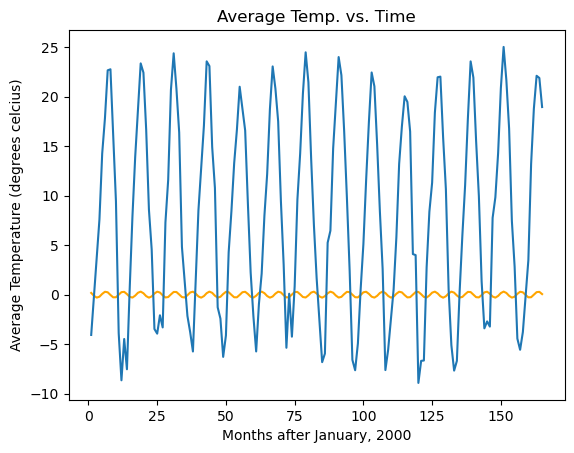

In [91]:
y = t_opt(x, A, B, D)
y2 = glt_mod

plt.plot(x, y, color = 'orange', label = 'fit')
plt.plot(x, y2, label = 'data')
plt.xlabel('Months after January, 2000')
plt.ylabel('Average Temperature (degrees celcius)')
plt.title('Average Temp. vs. Time')

# print(y)
# print(x)

In [92]:
# Parameters w/ error

print('A: ', parameters[0], '+-', err[0])
print('B: ', parameters[1], '+-', err[1])
print('D: ', parameters[2], '+-', err[2])

A:  0.3056756383697179 +- 1.4485546222268175
B:  0.9987256693960241 +- 0.0984935049019832
D:  1.537540325312345 +- 9.432205588897835


## 2. Problem 2: Linear Regression

In [152]:
from astropy.io import ascii
from astropy.table import Table

In [241]:
glbl = Table.read('global_SF6_MM.dat', format='ascii')

display(glbl)

SF6ottoyr,SF6ottomon,SF6ottoNHm,SF6ottoNHsd,SF6ottoSHm,SF6ottoSHsd,SF6ottoGLm,SF6ottoGLsd
int32,int32,float64,float64,float64,float64,float64,float64
1995,1,3.533,0.029,3.207,0.125,3.37,0.064
1995,2,3.512,0.154,3.282,0.193,3.397,0.122
1995,3,3.558,0.159,3.244,0.12,3.401,0.1
1995,4,3.618,0.09,3.287,0.17,3.453,0.094
1995,5,3.626,0.133,3.308,0.139,3.467,0.099
1995,6,3.551,0.119,3.297,0.112,3.424,0.081
1995,7,3.677,0.093,3.262,0.124,3.47,0.078
1995,8,3.675,0.211,3.259,0.191,3.467,0.143
1995,9,3.626,0.063,3.346,0.064,3.486,0.043


In [269]:
gbl = glbl.to_pandas()
gbl = gbl[['SF6ottoyr', 'SF6ottoGLm', 'SF6ottoGLsd']]
display(gbl)

,SF6ottoyr,SF6ottoGLm,SF6ottoGLsd
0,1995,3.370,0.064
1,1995,3.397,0.122
2,1995,3.401,0.100
3,1995,3.453,0.094
4,1995,3.467,0.099
...,...,...,...
223,2013,NaN,NaN
224,2013,NaN,NaN
225,2013,NaN,NaN
226,2013,NaN,NaN


<ErrorbarContainer object of 3 artists>

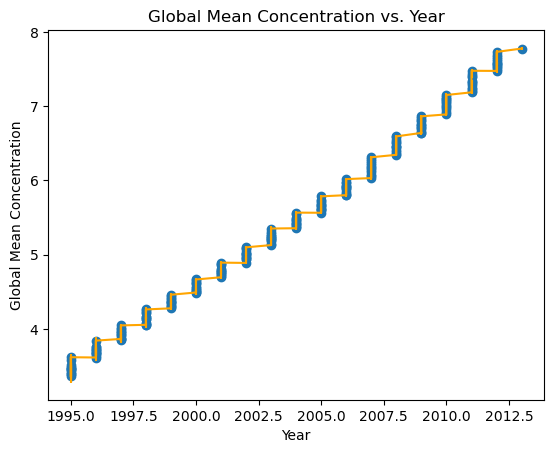

In [250]:
x = gbl['SF6ottoyr']
y = gbl['SF6ottoGLm']
gbl_error = gbl['SF6ottoGLsd']

plt.xlabel('Year')
plt.ylabel('Global Mean Concentration')
plt.title('Global Mean Concentration vs. Year')

plt.scatter(x, y)
plt.errorbar(x, y, yerr = gbl_error, fmt = 'orange')

In [270]:
gbl = gbl.drop(gbl.tail(11).index)
display(gbl)

,SF6ottoyr,SF6ottoGLm,SF6ottoGLsd
0,1995,3.370,0.064
1,1995,3.397,0.122
2,1995,3.401,0.100
3,1995,3.453,0.094
4,1995,3.467,0.099
...,...,...,...
212,2012,7.631,0.019
213,2012,7.668,0.026
214,2012,7.695,0.022
215,2012,7.730,0.022


In [306]:
xvals = gbl['SF6ottoyr']
yvals = gbl['SF6ottoGLm']

def g_opt(xvals, m, b):
    return m*xvals + b

pars, cov = fit.curve_fit(g_opt, xvals, yvals)
err2 = np.sqrt(np.diag(cov))

m, b = pars

dm, db = err2

print(r"m = " + str(m) + " \u00b1 " + str(dm))
print("B = " + str(b) + " \u00b1 " + str(db))

m = 0.23836032664697793 ± 0.0013626007684942253
B = -472.13433113790944 ± 2.7300395478624524


Text(0.5, 1.0, 'Global Mean Concentration vs. Year (with fit included in orange)')

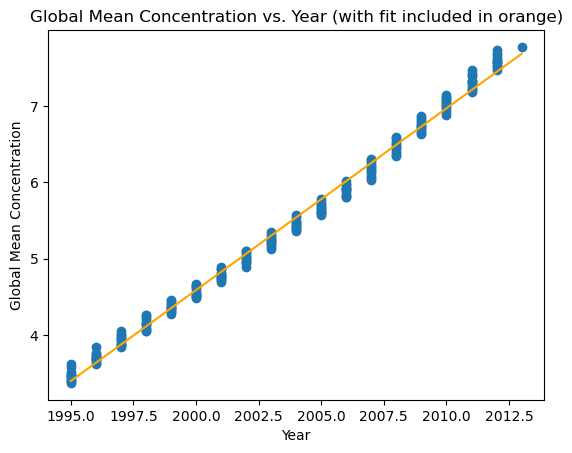

In [290]:
y_opt = g_opt(xvals,m,b)

plt.plot(xvals, y_opt, color = 'orange', label = 'fit')
plt.scatter(x, y)

plt.xlabel('Year')
plt.ylabel('Global Mean Concentration')
plt.title('Global Mean Concentration vs. Year (with fit included in orange)')

Text(0.5, 1.0, 'Global Mean Concentration vs. Year (Residuals Plot)')

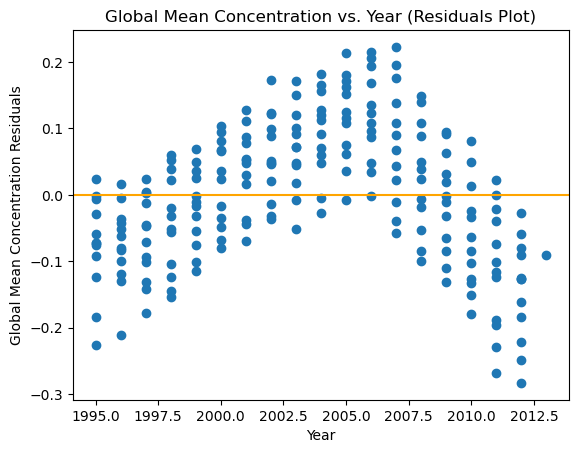

In [296]:
y_res = y_opt - y

plt.scatter(x, y_res)
plt.axhline(y = 0, color = 'orange')

plt.xlabel('Year')
plt.ylabel('Global Mean Concentration Residuals')
plt.title('Global Mean Concentration vs. Year (Residuals Plot)')

In [317]:
chisq = np.sum((y_res/db)**2)
dof = 217

rchisq = chisq/dof

print(r"m = " + str(m) + " \u00b1 " + str(dm))
print("B = " + str(b) + " \u00b1 " + str(db))
print('reduced chi squared: ', rchisq)

# I do not think that the linear model is appropriate because the residuals plot resembles some recognizable structure
# meaning that the residuals are not randomly distributed. This most likely means that the data plotted does not have
# any linear relationship

m = 0.23836032664697793 ± 0.0013626007684942253
B = -472.13433113790944 ± 2.7300395478624524
reduced chi squared:  0.001457177689820317
